# RFM анализ

In [159]:
file = 'RFM_ht_data.csv'

In [187]:
import pandas as pd
import numpy as np


# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'svg'")

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['image.cmap'] = 'viridis'

In [161]:
df = pd.read_csv(file, parse_dates = ['InvoiceDate']).rename(columns={'InvoiceNo':'invoice_no', 
                                                                      'CustomerCode':'customer_code',
                                                                     'InvoiceDate':'invoice_date',
                                                                     'Amount':'amount'})

C:\Users\tvoya\AppData\Local\Temp\ipykernel_16896\3758673341.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, parse_dates = ['InvoiceDate']).rename(columns={'InvoiceNo':'invoice_no',


In [162]:
df['invoice_no'] = df['invoice_no'].astype('str')
df['customer_code'] = df['customer_code'].astype('str')

In [163]:
df

,invoice_no,customer_code,invoice_date,amount
0,C0011810010001,19067290,2020-09-01,1716.00
1,C0011810010017,13233933,2020-09-01,1489.74
2,C0011810010020,99057968,2020-09-01,151.47
3,C0011810010021,80007276,2020-09-01,146.72
4,C0011810010024,13164076,2020-09-01,104.00
...,...,...,...,...
332725,S0081810310459,14092500,2020-09-30,3801.87
332726,S0081810310461,99065678,2020-09-30,5769.88
332727,S0081810310462,19029918,2020-09-30,736.88
332728,S0081810310463,13020033,2020-09-30,1475.20


In [164]:
df.dtypes

invoice_no               object
customer_code            object
invoice_date     datetime64[ns]
amount                  float64
dtype: object

In [165]:
mindate = df['invoice_date'].min()
maxdate = df['invoice_date'].max()

print(f'Min date : {mindate}')
print(f'Max date : {maxdate}')
print(f'Range : {maxdate - mindate}')

Min date : 2020-09-01 00:00:00
Max date : 2020-09-30 00:00:00
Range : 29 days 00:00:00


In [166]:
# id including ALL rows
df['invoice_no'].nunique()

332730

In [167]:
# No of Customers
df['customer_code'].nunique()

123733

# 1. Какое максимальное кол-во покупок было совершено одним пользователем?

In [168]:
# 204
df.groupby('customer_code', as_index=False).agg({'amount':'count'}).sort_values('amount', ascending=False)

,customer_code,amount
89388,19057820,204
44594,13215452,113
10347,13032521,106
97077,19080880,99
119951,99003061,90
...,...,...
58910,13272861,1
58911,13272871,1
58913,13272875,1
58914,13272878,1


# 2. RFM

In [169]:
last_date = df.groupby('customer_code', as_index=False).agg({'invoice_date':'max'}).rename(columns={'invoice_date':'last_date'})

In [170]:
df_last = pd.merge(df, last_date, on = 'customer_code', how = 'left')
df_last

,invoice_no,customer_code,invoice_date,amount,last_date
0,C0011810010001,19067290,2020-09-01,1716.00,2020-09-30
1,C0011810010017,13233933,2020-09-01,1489.74,2020-09-01
2,C0011810010020,99057968,2020-09-01,151.47,2020-09-27
3,C0011810010021,80007276,2020-09-01,146.72,2020-09-23
4,C0011810010024,13164076,2020-09-01,104.00,2020-09-30
...,...,...,...,...,...
332725,S0081810310459,14092500,2020-09-30,3801.87,2020-09-30
332726,S0081810310461,99065678,2020-09-30,5769.88,2020-09-30
332727,S0081810310462,19029918,2020-09-30,736.88,2020-09-30
332728,S0081810310463,13020033,2020-09-30,1475.20,2020-09-30


In [171]:
df_last[df_last['customer_code']== '99099959']

,invoice_no,customer_code,invoice_date,amount,last_date
160872,D0511810150446,99099959,2020-09-15,854.56,2020-09-22
233649,D0511810220371,99099959,2020-09-22,590.00,2020-09-22


In [172]:
rfmTable = df_last.groupby('customer_code', as_index=False).agg({
    'invoice_date': lambda x: (df_last['last_date'].max() - x.max()).days, 
    'invoice_no': lambda x: len(x), 
    'amount': lambda x: x.sum()
})

In [173]:
rfmTable.rename(columns={'invoice_date': 'recency', 
                         'invoice_no': 'frequency', 
                         'amount': 'monetary_value'}, inplace=True)

In [174]:
rfmTable

,customer_code,recency,frequency,monetary_value
0,02213019,19,1,1609.20
1,02213042,22,3,9685.48
2,02213071,29,1,415.00
3,02213088,23,1,305.00
4,02213092,25,1,1412.88
...,...,...,...,...
123728,99099927,10,1,961.10
123729,99099936,0,1,1521.78
123730,99099959,8,2,1444.56
123731,99099963,19,1,3018.91


In [175]:
rfmTable_1 = rfmTable.drop(columns=['customer_code'])

In [176]:
rfmTable_1.dtypes

recency             int64
frequency           int64
monetary_value    float64
dtype: object

In [177]:
rfmTable = rfmTable.apply(pd.to_numeric, errors='coerce')

In [178]:
quantiles = rfmTable.quantile(q=[0.25, 0.50, 0.75])

In [179]:
quantiles

,customer_code,recency,frequency,monetary_value
0.25,13142838.5,2.0,1.0,765.00
0.50,13284613.0,8.0,2.0,1834.48
0.75,19067311.5,16.0,3.0,4008.84


In [180]:
# Определение функций RClass и FMClass
def RClass(value, parameter_name, quantiles_table):
    if value <= quantiles_table[parameter_name][0.25]:
        return 1
    elif value <= quantiles_table[parameter_name][0.50]:
        return 2
    elif value <= quantiles_table[parameter_name][0.75]: 
        return 3
    else:
        return 4

def FMClass(value, parameter_name, quantiles_table):
    if value <= quantiles_table[parameter_name][0.25]:
        return 4
    elif value <= quantiles_table[parameter_name][0.50]:
        return 3
    elif value <= quantiles_table[parameter_name][0.75]: 
        return 2
    else:
        return 1

In [181]:
rfmSegmentation = rfmTable.copy()  # Создаем копию исходной таблицы

In [182]:
# Применение функций к таблице rfmSegmentation
rfmSegmentation['R'] = rfmSegmentation['recency'].apply(RClass, args=('recency', quantiles))
rfmSegmentation['F'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency', quantiles))
rfmSegmentation['M'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value', quantiles))

In [183]:
# Создание сегментации RFM
rfmSegmentation['RFM_Segment'] = rfmSegmentation['R'].astype(str) + rfmSegmentation['F'].astype(str) + rfmSegmentation['M'].astype(str)

In [184]:
# Итоговая таблица rfmSegmentation
rfmSegmentation = rfmSegmentation[['recency', 'frequency', 'monetary_value', 'R', 'F', 'M', 'RFM_Segment']]

In [185]:
rfmSegmentation

,recency,frequency,monetary_value,R,F,M,RFM_Segment
0,19,1,1609.20,4,4,3,443
1,22,3,9685.48,4,2,1,421
2,29,1,415.00,4,4,4,444
3,23,1,305.00,4,4,4,444
4,25,1,1412.88,4,4,3,443
...,...,...,...,...,...,...,...
123728,10,1,961.10,3,4,3,343
123729,0,1,1521.78,1,4,3,143
123730,8,2,1444.56,2,3,3,233
123731,19,1,3018.91,4,4,2,442


In [190]:
pd.crosstab(index = rfmSegmentation.R, columns = rfmSegmentation.F)

F,1,2,3,4
R,,,,
1,14433,4671,5795,6074
2,9634,5889,8633,10399
3,3091,3748,7734,13263
4,542,1311,5415,23101


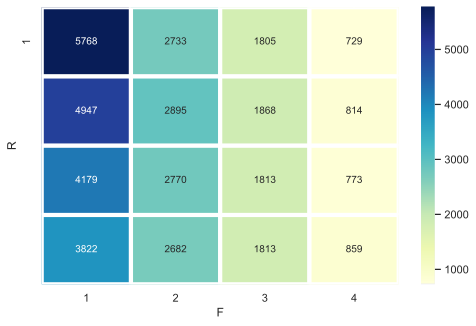

In [192]:

rfm_table = rfmSegmentation.pivot_table(
                        index='R', 
                        columns='F', 
                        values='monetary_value', 
                        aggfunc=np.median).applymap(int)
sns.heatmap(rfm_table, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=4.15, annot_kws={"size": 10},yticklabels=4);

# 3. Какая верхняя граница у суммы покупок у пользователей с классом 4 в подсегменте М? (Другими словами: пользователи, у которых сумма покупок от 0 до Х попадают в 4 класс в подсегменте М)

In [193]:
# Фильтрация пользователей с M=4
m_class_4 = rfmSegmentation[rfmSegmentation['M'] == 4]

In [194]:
# Находим верхнюю границу для `monetary_value` у пользователей с M=4
upper_bound_m_class_4 = m_class_4['monetary_value'].max()

In [195]:
print(f"Верхняя граница суммы покупок для пользователей с классом 4 в подсегменте M: {upper_bound_m_class_4}")


Верхняя граница суммы покупок для пользователей с классом 4 в подсегменте M: 765.0


# 4. Какая нижняя граница у количества покупок у пользователей с классом 1 в подсегменте F?

In [196]:
# Фильтрация пользователей с F=1
f_class_1 = rfmSegmentation[rfmSegmentation['F'] == 1]

# Находим нижнюю границу для `frequency` у пользователей с F=1
lower_bound_f_class_1 = f_class_1['frequency'].min()

print(f"Нижняя граница количества покупок для пользователей с классом 1 в подсегменте F: {lower_bound_f_class_1}")

Нижняя граница количества покупок для пользователей с классом 1 в подсегменте F: 4


# 5. Какое максимальное количество дней может пройти с момента последней покупки для того, чтобы пользователь попал в класс 2 в подсегменте R?

In [197]:
# Фильтрация пользователей с R=2
r_class_2 = rfmSegmentation[rfmSegmentation['R'] == 2]

# Находим максимальное значение `recency` у пользователей с R=2
max_recency_r_class_2 = r_class_2['recency'].max()

print(f"Максимальное количество дней, которое может пройти с момента последней покупки для класса 2 в подсегменте R: {max_recency_r_class_2}")


Максимальное количество дней, которое может пройти с момента последней покупки для класса 2 в подсегменте R: 8


# 6. Сколько пользователей попало в сегмент 111?



In [198]:
# Подсчет количества пользователей в сегменте 111
segment_111_count = rfmSegmentation[(rfmSegmentation['R'] == 1) & 
                                     (rfmSegmentation['F'] == 1) & 
                                     (rfmSegmentation['M'] == 1)].shape[0]

print(f"Количество пользователей в сегменте 111: {segment_111_count}")


Количество пользователей в сегменте 111: 9705


# 7. Сколько пользователей попало в сегмент 311?



In [201]:
# Подсчет количества пользователей в сегменте 311
segment_311_count = rfmSegmentation[(rfmSegmentation['R'] == 3) & 
                                     (rfmSegmentation['F'] == 1) & 
                                     (rfmSegmentation['M'] == 1)].shape[0]

print(f"Количество пользователей в сегменте 111: {segment_311_count}")


Количество пользователей в сегменте 111: 1609


# 8. В каком RFM-сегменте самое большое кол-во пользователей?



In [202]:
# Подсчет количества пользователей в каждом RFM-сегменте
segment_counts = rfmSegmentation['RFM_Segment'].value_counts()

# Нахождение сегмента с максимальным количеством пользователей
max_segment = segment_counts.idxmax()
max_count = segment_counts.max()

print(f"RFM-сегмент с самым большим количеством пользователей: {max_segment}")
print(f"Количество пользователей в этом сегменте: {max_count}")


RFM-сегмент с самым большим количеством пользователей: 444
Количество пользователей в этом сегменте: 10624


# 9. В каком RFM-сегменте самое маленькое кол-во пользователей?



In [203]:
# Подсчет количества пользователей в каждом RFM-сегменте
segment_counts = rfmSegmentation['RFM_Segment'].value_counts()

# Нахождение сегмента с минимальным количеством пользователей
min_segment = segment_counts.idxmin()
min_count = segment_counts.min()

print(f"RFM-сегмент с самым маленьким количеством пользователей: {min_segment}")
print(f"Количество пользователей в этом сегменте: {min_count}")


RFM-сегмент с самым маленьким количеством пользователей: 414
Количество пользователей в этом сегменте: 2


# 10. Какое количество пользователей попало в самый малочисленный сегмент?

In [204]:
# Подсчет количества пользователей в каждом RFM-сегменте
segment_counts = rfmSegmentation['RFM_Segment'].value_counts()

# Нахождение минимального количества пользователей и соответствующего сегмента
min_count = segment_counts.min()

print(f"Количество пользователей в самом малочисленном сегменте: {min_count}")


Количество пользователей в самом малочисленном сегменте: 2
